In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
models_path = Path('Models_final_es')

In [2]:
NUM_EPOCHS = 150
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetSmall()
mobnet_lrg = MobileNetLarge()
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [3]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 53, device)
print("Done")

Done


In [ ]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 54, device)

print("Done")

In [ ]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 16, device)
print("Done")

In [ ]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 5, device)
print("Done")

In [ ]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 31, device)
print("Done")

In [ ]:
plot_loss_curves(res18_results[0],"ResNet18")

In [ ]:
plot_loss_curves(res50_results[0],"ResNet50")

In [ ]:
plot_loss_curves(mobnet_sml_results[0],"MobileNet Small")

In [ ]:
plot_loss_curves(mobnet_lrg_results[0],"MobileNet Large")

In [ ]:
plot_loss_curves(effnetb0_results[0],"EfficientNetB0")

In [ ]:
res18_results[2]
res50_results[2]
mobnet_sml_results[2]
mobnet_lrg_results[2]
effnetb0_results[2]

In [ ]:
model_loss = [res18_results[2]['model_loss'],res50_results[2]['model_loss'], mobnet_sml_results[2]['model_loss'], mobnet_lrg_results[2]['model_loss'], effnetb0_results[2]['model_loss']]
print(model_loss)

In [ ]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
inference_time = [res18_results[2]['model_inf_time'],res50_results[2]['model_inf_time'], mobnet_sml_results[2]['model_inf_time'], mobnet_lrg_results[2]['model_inf_time'], effnetb0_results[2]['model_inf_time']]
accuracy = [max(res18_results[0]['validation_acc']), max(res50_results[0]['validation_acc']), max(mobnet_sml_results[0]['validation_acc']), max(mobnet_lrg_results[0]['validation_acc']), max(effnetb0_results[0]['validation_acc'])]

print(inference_time)
print(accuracy)

plt.figure(figsize=(5,5))
plt.bar(models, accuracy)
plt.title('Accuracy graph')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, inference_time)
plt.title('Inference time graph')
plt.xlabel('Model')
plt.ylabel('Inference Time')
plt.show()

In [ ]:
from ptflops import get_model_complexity_info


image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

res = (3,resize[0],resize[1])

res18_macs, res18_params = get_model_complexity_info(final_res18_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

res50_macs, res50_params = get_model_complexity_info(final_res50_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_sml_macs, mobnet_sml_params = get_model_complexity_info(final_mobnet_sml_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_lrg_macs, mobnet_lrg_params = get_model_complexity_info(final_mobnet_lrg_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

effnetb0_macs, effnetb0_params = get_model_complexity_info(final_effnetb0_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

In [ ]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
num_params = [res18_params, res50_params, mobnet_sml_params, mobnet_lrg_params, effnetb0_params]
num_macs = [res18_macs, res50_macs, mobnet_sml_macs, mobnet_lrg_macs, effnetb0_macs]

plt.figure(figsize=(5,5))
plt.bar(models, num_params)
plt.title('Parameters graph')
plt.xlabel('Model')
plt.ylabel('Number of parameters')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, num_macs)
plt.title('Mult/Add Operations graph')
plt.xlabel('Model')
plt.ylabel('Number of MAC(s)')
plt.show()

print(num_macs, num_params)



In [4]:
data_dir = Path("final_dataset/")
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

data_transform = create_transform(resize=resize, rotate=5, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

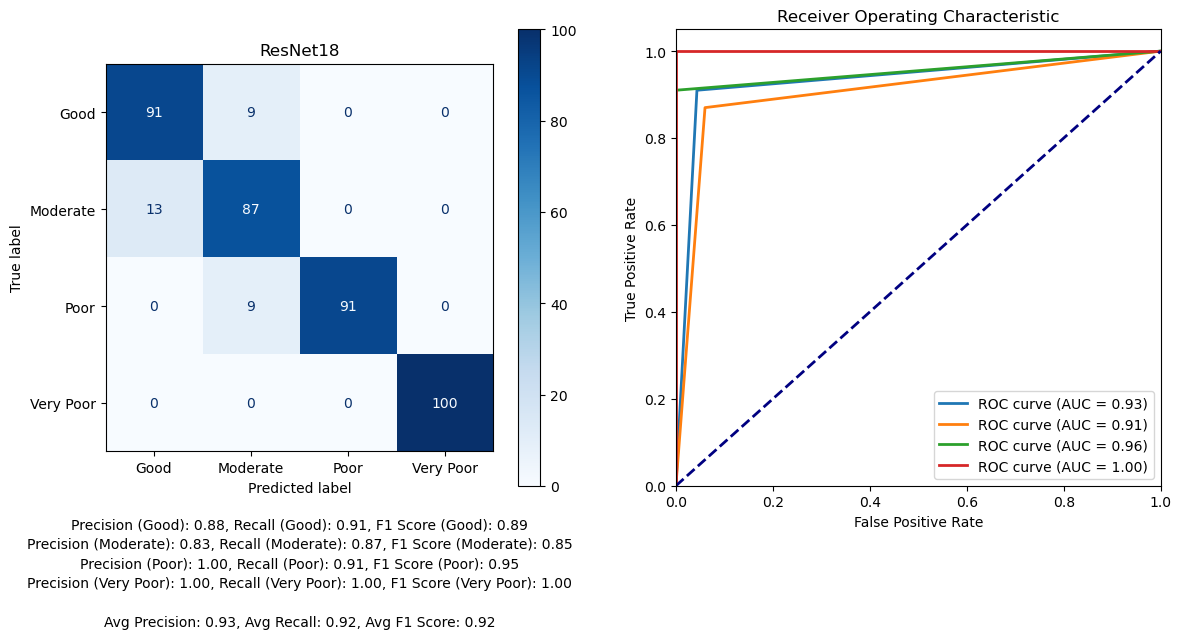

In [5]:
final_res18_model.to(device)
plot_all_measures(final_res18_model,test_dl,device,test_data.classes, "ResNet18")

In [6]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 54, device)

print("Done")

Done


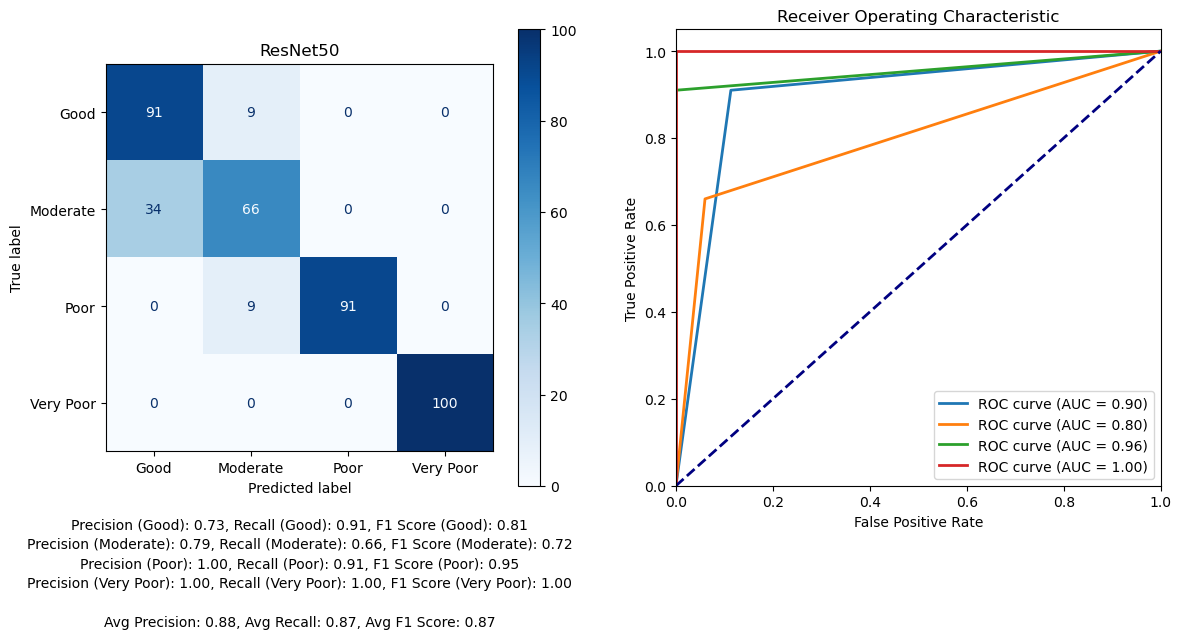

In [7]:
final_res50_model.to(device)
plot_all_measures(final_res50_model,test_dl,device,test_data.classes, "ResNet50")

In [8]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 16, device)
print("Done")

Done


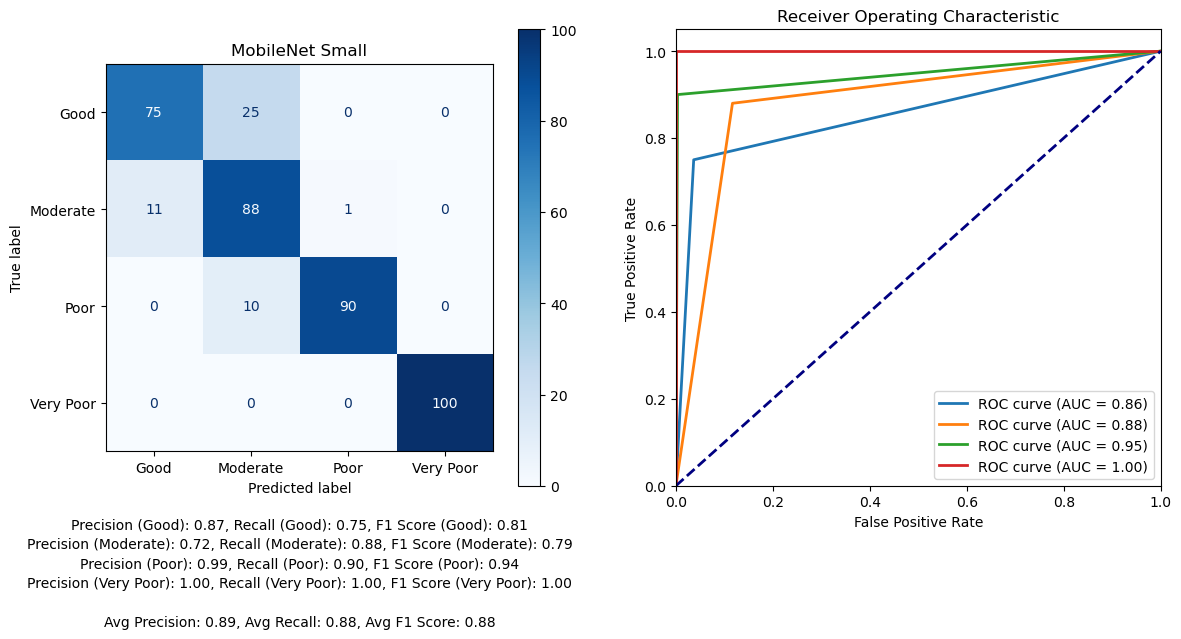

In [9]:
final_mobnet_sml_model.to(device)
plot_all_measures(final_mobnet_sml_model,test_dl,device,test_data.classes, "MobileNet Small")

In [10]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 5, device)
print("Done")

Done


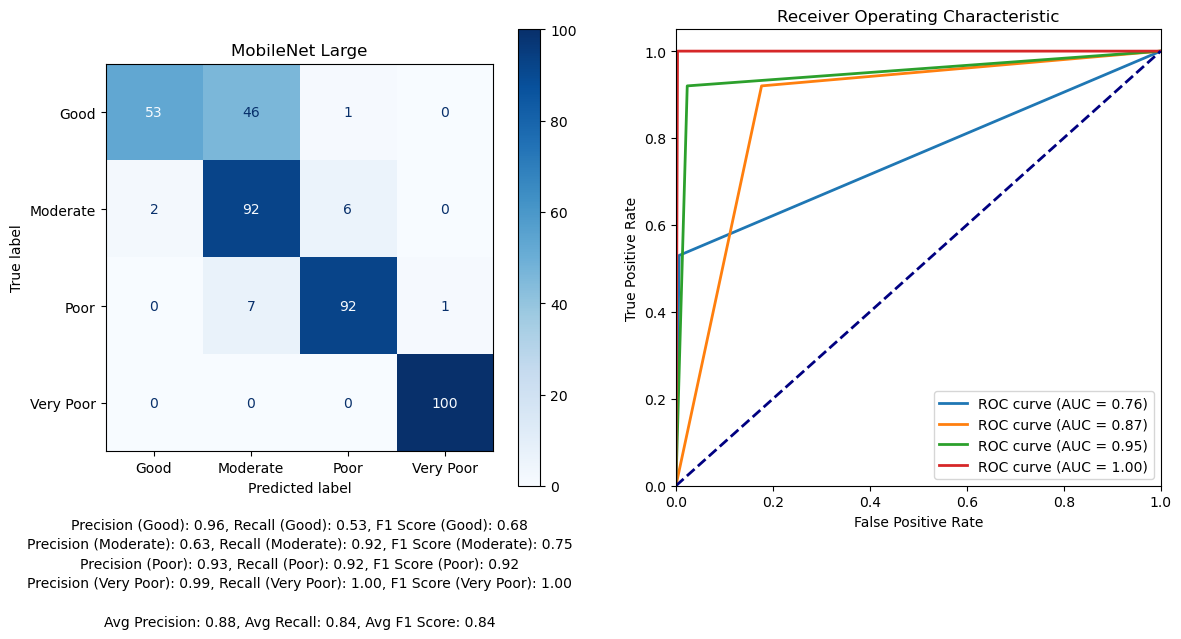

In [11]:
final_mobnet_lrg_model.to(device)
plot_all_measures(final_mobnet_lrg_model,test_dl,device,test_data.classes, "MobileNet Large")

In [12]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 31, device)
print("Done")

Done


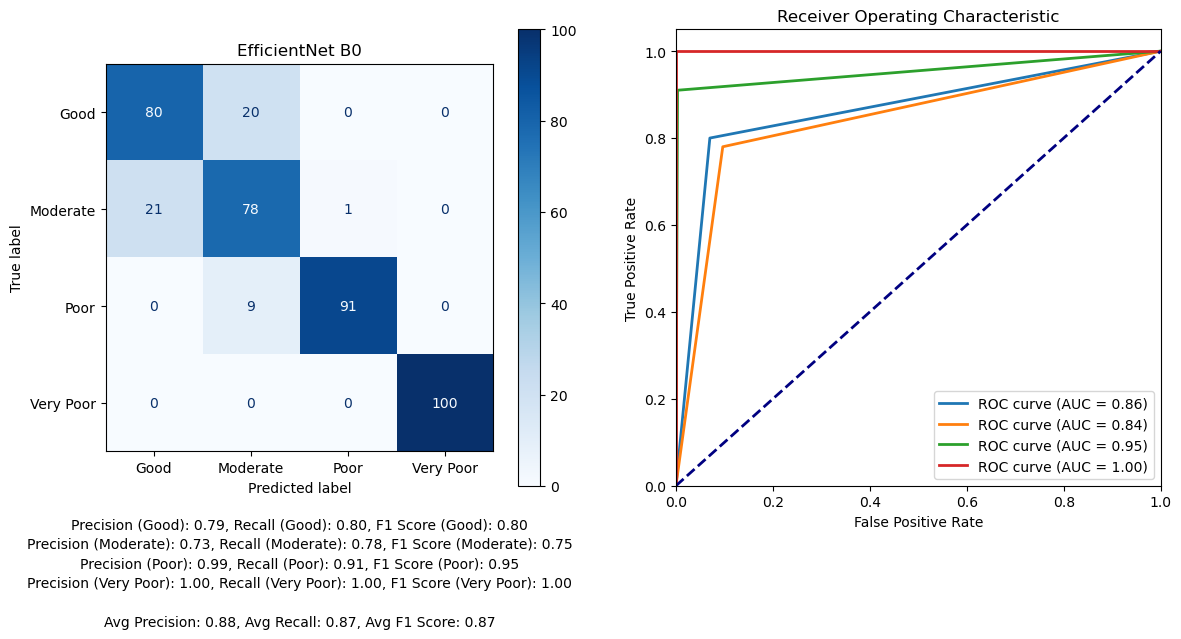

In [13]:
final_effnetb0_model.to(device)
plot_all_measures(final_effnetb0_model,test_dl,device,test_data.classes, "EfficientNet B0")